In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
sector = {'basic material': ['VMC', 'VALE', 'SCCO', 'RIO', 'PKX', 'IFF', 'MT', 'LIN', 'BHP', 'BBL'],
          'communication service': ['WPP', 'VZ', 'TU', 'RELX', 'OMC', 'NFLX', 'GOOG', 'EA', 'DISCA', 'DIS'],
          'consumer cyclical' : ['TM', 'SBUX', 'NKE', 'MCD', 'LVS', 'HD', 'GM', 'FORD', 'EBAY', "AMZN"],
          'consumer defensive': ['UL', 'NWL', 'KR', 'K', 'GIS', 'DEO', 'CPB', 'CCEP', 'BTI', "BG"],
          'energy' : ['XOM', 'TOT', 'SNP', 'RDS-B', 'PTR', 'EQNR', 'CVX', 'COP', "BP", 'ENB'],
          'financial service' : ['WFC-PL', 'V', 'TD', 'MS', 'MA', 'JPM', 'GS', 'C', 'BRK-A', 'BAC-PL'],
          'industrial' : ['PCAR', 'LUV', 'JCI', 'GE', 'GD', 'DE', 'DAL', 'CMI', 'CAT', 'ABB'],
          'healthcare' : ['ZBH', 'SNY', 'PFE', 'JNJ', 'GSK', 'FMS', 'CNC', 'CI', 'CAH', 'ANTM'],
          'real estate' : ['WY', 'WPC', 'VTR', 'SPG', 'O', 'NLY', 'MPW', 'HST', 'AVB', "ARE"],
          'technology' : ['TXN', 'TSM', 'STM', 'SAP', 'MU', 'INTC', 'IBM', 'HPQ', 'CSCO', 'AAPL']}


temp_dir = {'SYMBOL' : [],
            'INDUSTRIES' : [],
            'RETURN' : [],
            'MARKET RETURN': [],
            'SCORE' : []}

for sec in sector.keys():
    for ticker in sector[sec]:
        with open(f'{sec}/score/{ticker}.pkl', 'rb') as f:
            rank = pickle.load(f)
            df = pd.read_csv(f'data/{ticker}.csv')['stock_price']
            ret = ((df.iloc[-1] - df.iloc[0])/df.iloc[0]) * 100
            
            temp_dir['SYMBOL'].append(rank[0])
            temp_dir['INDUSTRIES'].append(rank[1])
            temp_dir['RETURN'].append(float(f'{rank[3]:.2f}'))
            temp_dir['MARKET RETURN'].append(float(f'{ret:.2f}'))
            temp_dir['SCORE'].append(float(f'{rank[2]:.2f}'))

            
ranking = pd.DataFrame(temp_dir)
ranking = ranking.sort_values('SCORE', ascending=False)
ranking['RANK'] = [i for i in range(1, len(ranking) + 1)]
ranking.set_index('RANK', inplace=True)
ranking

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
1,SCCO,Basic Materials,62.42,33.17,7.74
2,CNC,Healthcare,35.87,17.03,7.23
3,CI,Healthcare,28.63,2.77,6.50
4,INTC,Technology,31.23,6.34,6.30
5,IFF,Basic Materials,10.68,-29.58,6.05
...,...,...,...,...,...
96,PTR,Energy,-11.61,-57.33,-3.14
97,WPP,Communication Services,-6.91,-40.63,-3.34
98,GE,Industrial,-3.33,-37.53,-6.34


In [10]:
(ranking['RETURN'] - ranking['MARKET RETURN']).mean()

1.2275

In [4]:
ranking['MARKET RETURN'].mean()

15.9418

In [7]:
sum(ranking['SCORE'] > 0)

86

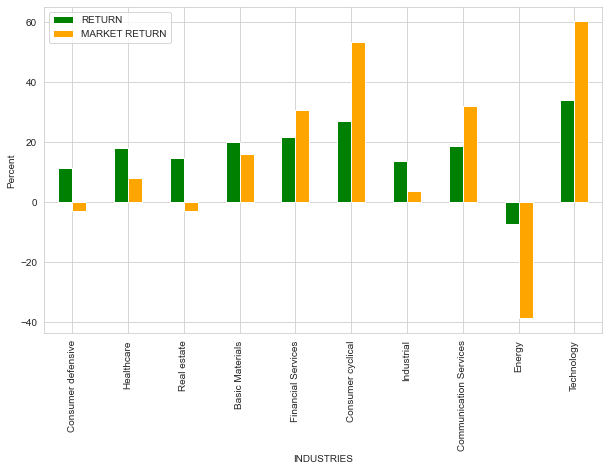

In [8]:
ranking.groupby('INDUSTRIES').mean().sort_values(by='SCORE', ascending=False).drop('SCORE', axis=1).plot.bar(color=['green', 'orange'], figsize=(10,6));
plt.ylabel('Percent');